### This notebook should be run in the same directory that contains patient folders.
### Example: 
- ecog_data_analysis *(folder)*
    - ecogtools_demo *(jupter notebook)*
    - patient_2002 *(folder)*
        - edf file *(edf)*
        - merged trigger *(csv)*
        - behavioral_data_2002 *(folder)*
            - ToM_Loc_2002.json
 
### Image files will be saved in new folder in patient folder (ex. patient_2002)

In [1]:
from __future__ import print_function

import numpy as np
from numpy.fft import fft, ifft

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import os

import mne
from mne.time_frequency import tfr_morlet, psd_multitaper

import ecogtools

In [2]:
%matplotlib inline

In [3]:
# Define variables
patient_num = "2002"

taskname = "ToM_Loc"

event_names = ['quest_start', 'story_start', 'time_of_resp']

event_id = {'b/story_start': 1, 'b/quest_start': 4, 'b/time_of_resp': 16,
            'p/story_start': 2, 'p/quest_start': 5, 'p/time_of_resp': 17}

In [4]:
data = ecogtools.Data(patient_num, taskname, event_names, event_id)

Extracting edf Parameters from patient_2002/john_2002.edf...
Setting channel info structure...
Creating Raw.info structure...
Ready.


In [5]:
channels_of_interest = ['RTG31']
data.initialize_epochs_object(channels_of_interest)

60 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 60 events and 12001 original time points ...
0 bad epochs dropped


In [6]:
evoked_belief = data.create_evoked("b/quest_start")
evoked_photo = data.create_evoked("p/quest_start")

In [7]:
evoked_combined = mne.combine_evoked(data.evoked_list, weights=[1, -1])

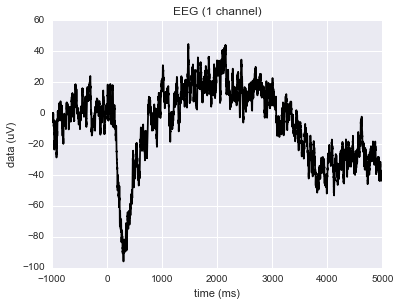

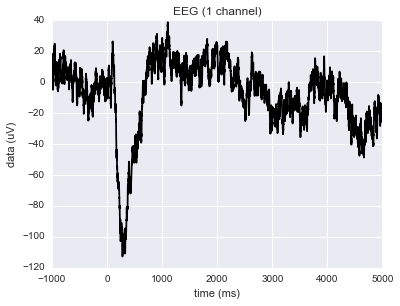

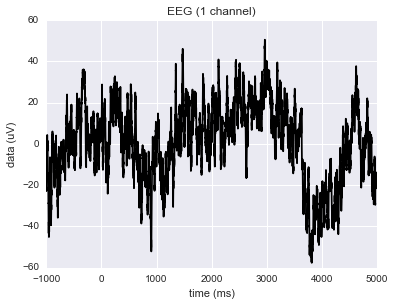

In [8]:
evoked_belief.plot()
evoked_photo.plot()
evoked_combined.plot();

In [9]:
freqs = np.arange(2, 100, 5)
n_cycles = freqs/2.

In [10]:
power1, itc1 = data.compute_power('b/quest_start', freqs, n_cycles)

In [11]:
power2, itc2 = data.compute_power('p/quest_start', freqs, n_cycles)

Applying baseline correction (mode: ratio)


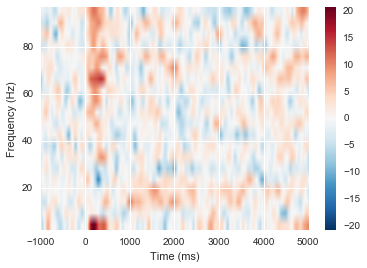

In [12]:
power1.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

Applying baseline correction (mode: ratio)


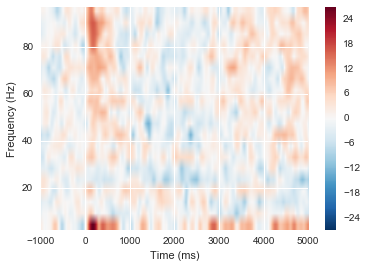

In [13]:
power2.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

In [14]:
combined = data.compute_diff_power(power1, power2)

No baseline correction applied


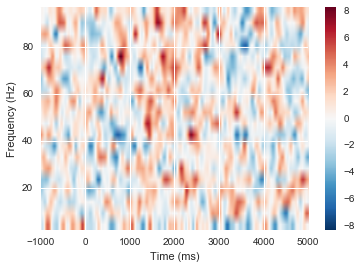

In [15]:
combined.plot([0]);

Applying baseline correction (mode: ratio)


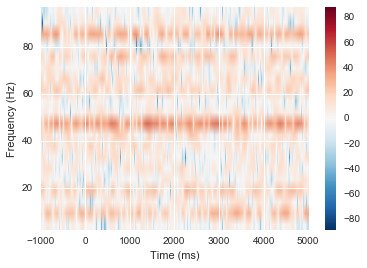

In [16]:
combined.plot([0], baseline=(-1., 0), mode="ratio", dB=True);